In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

ModuleNotFoundError: No module named 'pandas'

# AAPL Close Price with MA20 and MA200

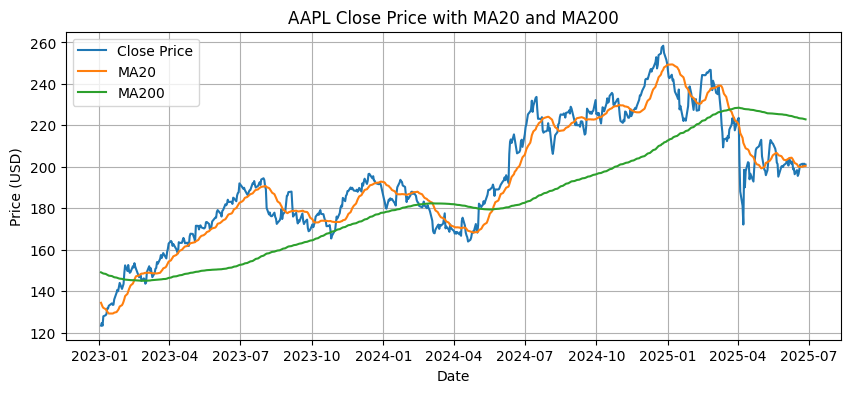

In [ ]:
final_df = pd.read_csv('stocks_data_full_new.csv')
final_df['Date'] = pd.to_datetime(final_df['Date'])

aapl_df = final_df[final_df['Ticker'] == 'AAPL']

plt.figure(figsize=(10,4))
plt.plot(aapl_df['Date'], aapl_df['Close'], label='Close Price')
plt.plot(aapl_df['Date'], aapl_df['MA20'], label='MA20')
plt.plot(aapl_df['Date'], aapl_df['MA200'], label='MA200')
plt.title('AAPL Close Price with MA20 and MA200')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

This plot shows the daily closing price of AAPL stock along with its 20-day and 200-day moving averages.  
It helps visualize both short-term and long-term trends in the stock's price movement.

# AAPL RSI (Relative Strength Index) Over Time

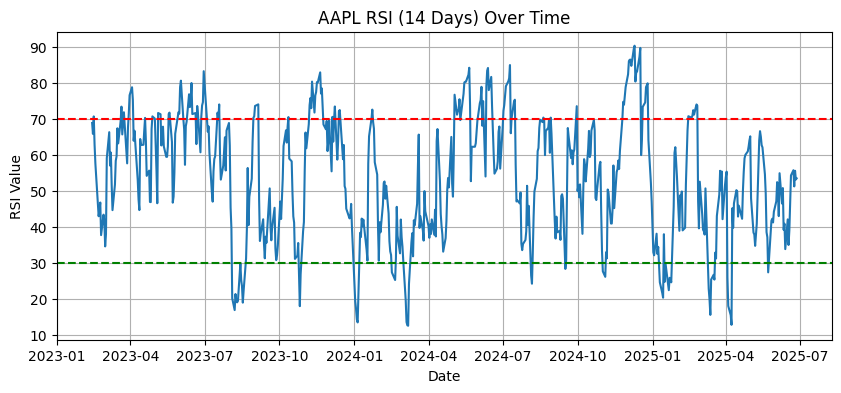

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(data=aapl_df[28:], x='Date', y='RSI_14')
plt.title('AAPL RSI (14 Days) Over Time')
plt.axhline(70, color='red', linestyle='--')  #Overbought line
plt.axhline(30, color='green', linestyle='--')  #Oversold line
plt.xlabel('Date')
plt.ylabel('RSI Value')
plt.grid(True)
plt.show()

This chart displays the 14-day RSI values for AAPL.  
It indicates momentum and highlights periods where the stock may be overbought (RSI > 70) or oversold (RSI < 30).


# AAPL ATR (Average True Range) Over Time

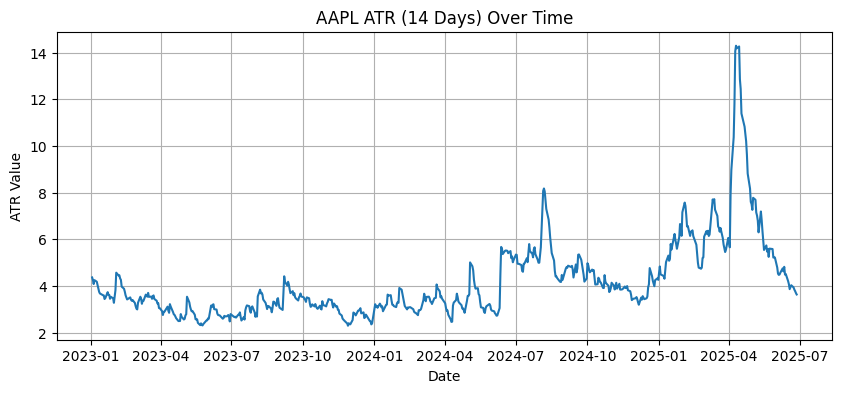

In [ ]:
plt.figure(figsize=(10,4))
sns.lineplot(data=aapl_df, x='Date', y='ATR_14')
plt.title('AAPL ATR (14 Days) Over Time')
plt.xlabel('Date')
plt.ylabel('ATR Value')
plt.grid(True)
plt.show()

This plot shows the 14-day Average True Range (ATR) for AAPL.  
It measures the stock's daily volatility and helps assess the level of price fluctuations over time.

# Distribution of P/E Ratios Across Companies

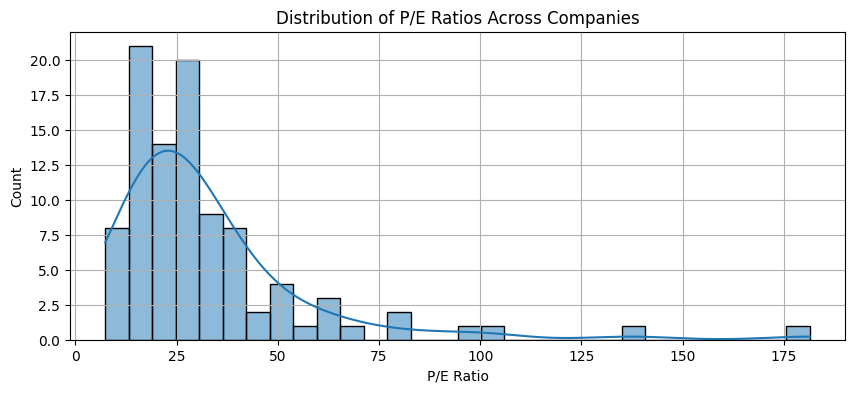

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(final_df.drop_duplicates('Ticker')['P/E'], bins=30, kde=True)
plt.title('Distribution of P/E Ratios Across Companies')
plt.xlabel('P/E Ratio')
plt.ylabel('Count')
plt.grid(True)
plt.show()

This histogram illustrates the distribution of Price-to-Earnings (P/E) ratios across different companies.  
It helps identify how companies are valued relative to their earnings.


# Distribution of Market Capitalization Across Companies

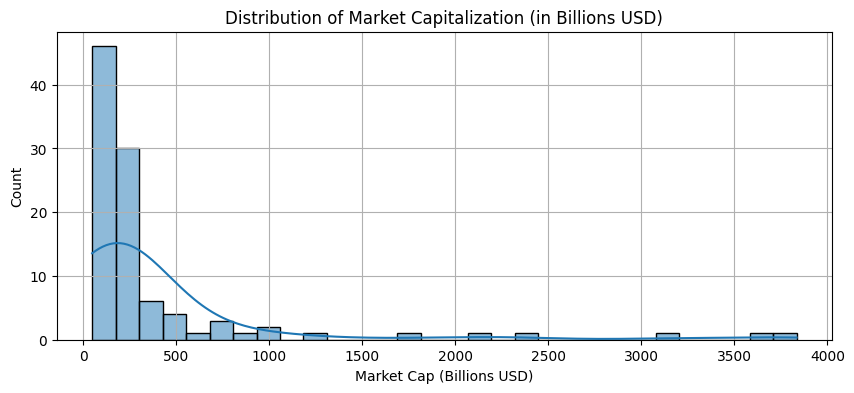

In [ ]:
plt.figure(figsize=(10,4))
sns.histplot(final_df.drop_duplicates('Ticker')['Market_Cap']/1e9, bins=30, kde=True)
plt.title('Distribution of Market Capitalization (in Billions USD)')
plt.xlabel('Market Cap (Billions USD)')
plt.ylabel('Count')
plt.grid(True)
plt.show()

This plot shows the spread of companies by their total market value (in billions of USD).  
It highlights the presence of small, mid-sized, and large-cap stocks in the dataset.

# Daily Return Distribution for Selected Stocks (Boxplot)

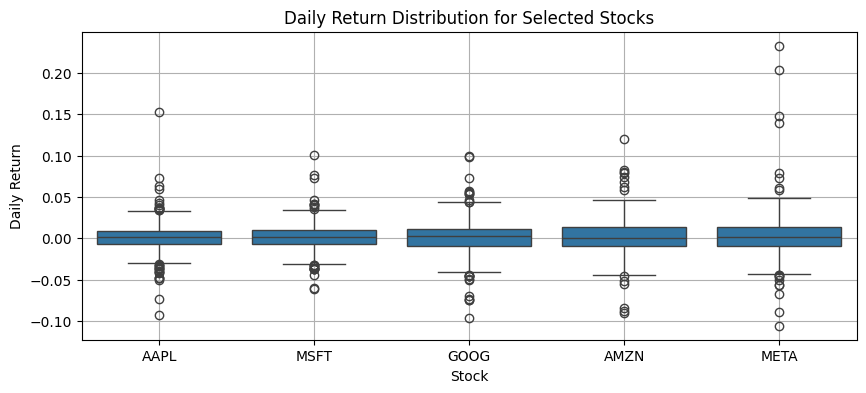

In [ ]:
final_df['Daily_Return'] = final_df.groupby('Ticker')['Close'].pct_change()

sample_tickers = ['AAPL', 'MSFT', 'GOOG', 'AMZN', 'META']
sample_df = final_df[final_df['Ticker'].isin(sample_tickers)]

plt.figure(figsize=(10,4))
sns.boxplot(data=sample_df, x='Ticker', y='Daily_Return')
plt.title('Daily Return Distribution for Selected Stocks')
plt.xlabel('Stock')
plt.ylabel('Daily Return')
plt.grid(True)
plt.show()


This boxplot compares the daily returns of selected major companies.  
It helps visualize volatility, risk, and consistency in stock performance.

# AAPL Volume Traded Over Time

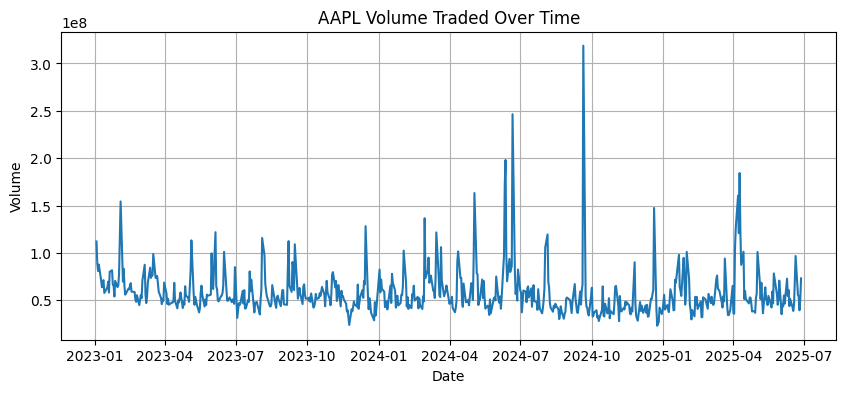

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(aapl_df['Date'], aapl_df['Volume'])
plt.title('AAPL Volume Traded Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

This plot tracks the daily trading volume of AAPL stock over time.  
It reflects investor activity and liquidity in the market.


## Correlation Heatmap of Technical Indicators (AAPL)

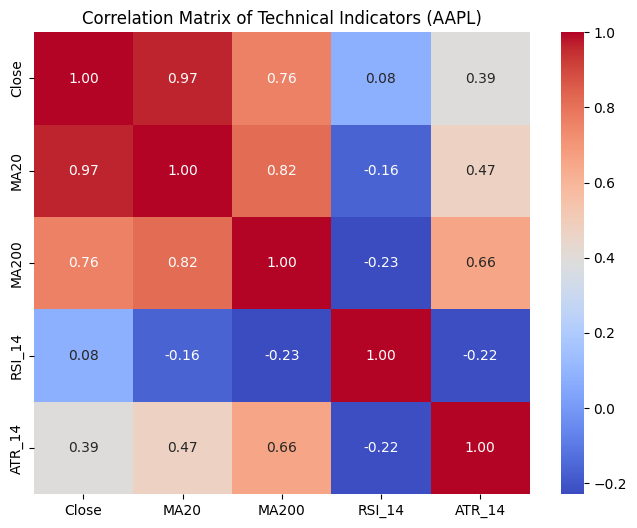

In [ ]:
aapl_df = final_df[final_df['Ticker'] == 'AAPL']
features = ['Close', 'MA20', 'MA200', 'RSI_14', 'ATR_14']
correlation_matrix = aapl_df[features].corr()

plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Technical Indicators (AAPL)')
plt.show()


This heatmap shows the correlation between key technical indicators for AAPL.  
It helps identify relationships between indicators such as Moving Averages (MA20/MA200), RSI, ATR, and the stock's close price.  
For example, we expect MA20 and MA200 to be highly correlated with the closing price, while ATR and RSI capture different aspects like volatility and momentum.

## Top 10 Companies by Market Capitalization

C:\Users\amitf\AppData\Local\Temp\ipykernel_41432\31889256.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Market_Cap', y='Ticker', palette='viridis')


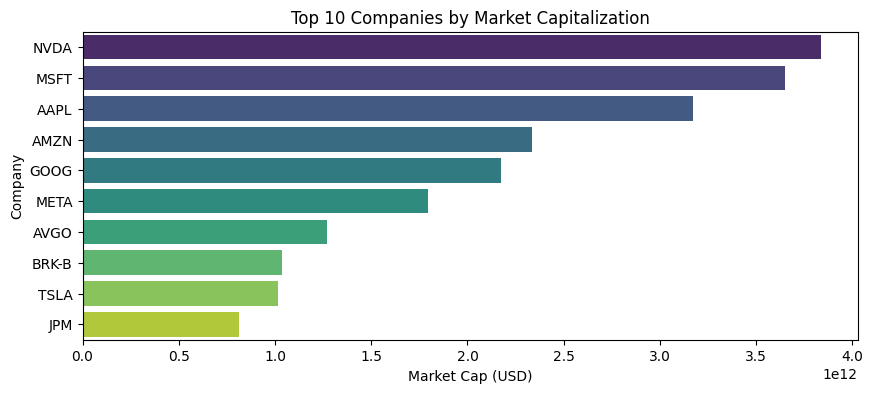

In [ ]:
sorted_df = final_df.sort_values(by='Date', ascending=False)
latest_market_cap = sorted_df.drop_duplicates(subset='Ticker')[['Ticker', 'Market_Cap']]
top10 = latest_market_cap.sort_values(by='Market_Cap', ascending=False).head(10)

plt.figure(figsize=(10, 4))
sns.barplot(data=top10, x='Market_Cap', y='Ticker', palette='viridis')
plt.title('Top 10 Companies by Market Capitalization')
plt.xlabel('Market Cap (USD)')
plt.ylabel('Company')
plt.show()


This bar chart displays the ten largest companies in our dataset by market capitalization.  
It gives a sense of the relative size of each company in the stock market and shows how the dataset includes both large-cap and mid-cap stocks.

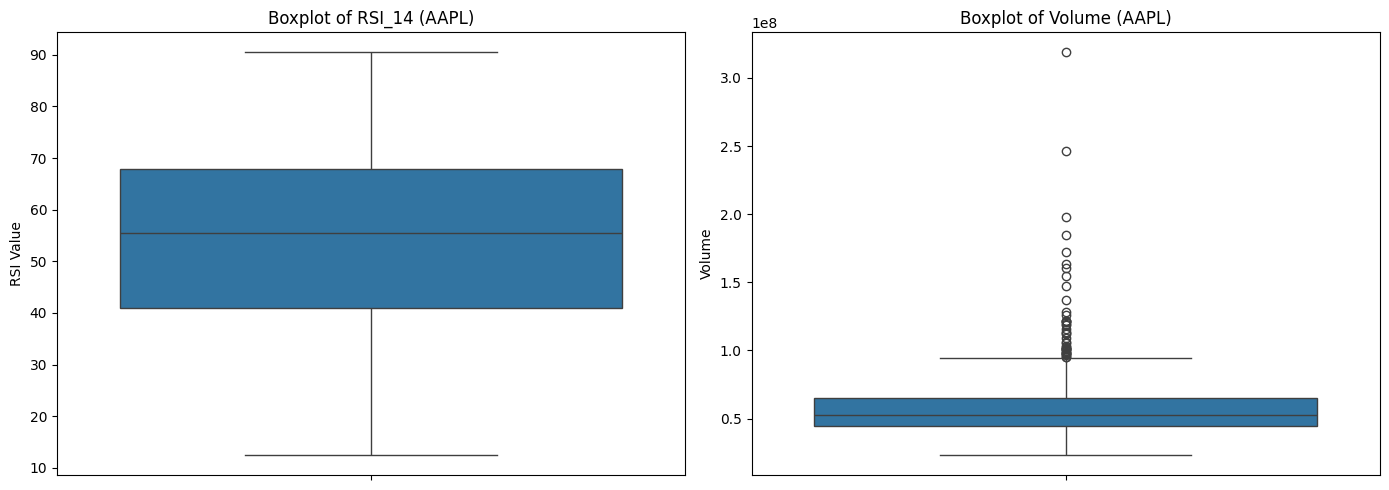

In [ ]:
# Filter a specific stock to focus on (e.g., AAPL)
aapl_df = final_df[final_df['Ticker'] == 'AAPL'].dropna(subset=['RSI_14', 'Volume'])

# Plot boxplots
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=aapl_df['RSI_14'])
plt.title('Boxplot of RSI_14 (AAPL)')
plt.ylabel('RSI Value')

plt.subplot(1, 2, 2)
sns.boxplot(y=aapl_df['Volume'])
plt.title('Boxplot of Volume (AAPL)')
plt.ylabel('Volume')

plt.tight_layout()
plt.show()


## Stage 2

In [ ]:
import pandas as pd

# טען את הקובץ
df = pd.read_csv("stocks_data_full_new.csv")
df['Date'] = pd.to_datetime(df['Date'])

# סינון רק לתאריכים שאנחנו צריכים
df = df[(df['Date'] >= '2025-03-20') & (df['Date'] <= '2025-04-30')]

# חלונות זמן לפי הניתוח
window_before = ('2025-03-20', '2025-03-31')
window_event  = ('2025-04-01', '2025-04-09')
window_after  = ('2025-04-10', '2025-04-30')

# נמצא את כל הטיקרים שיש בקובץ
tickers = df['Ticker'].unique()

# רשימה לאגירת פיצ’רים
feature_rows = []

In [ ]:
for ticker in tickers:
    stock_df = df[df['Ticker'] == ticker]

    # ממוצעים לפני
    before = stock_df[(stock_df['Date'] >= window_before[0]) & (stock_df['Date'] <= window_before[1])]
    event = stock_df[(stock_df['Date'] >= window_event[0]) & (stock_df['Date'] <= window_event[1])]
    after  = stock_df[(stock_df['Date'] >= window_after[0])  & (stock_df['Date'] <= window_after[1])]

    # ודא שיש מספיק נתונים בשלושת החלונות
    if before.empty or event.empty or after.empty:
        continue

    # מחשוב ממוצעים
    mean_close_before = before['Close'].mean()
    mean_close_event = event['Close'].mean()
    mean_close_after = after['Close'].mean()

    mean_rsi_before = before['RSI_14'].mean()
    mean_rsi_event = event['RSI_14'].mean()
    mean_rsi_after = after['RSI_14'].mean()

    mean_atr_before = before['ATR_14'].mean()
    mean_atr_event = event['ATR_14'].mean()
    mean_atr_after = after['ATR_14'].mean()

    # פיצ’רים מחושבים
    ΔClose_event = (mean_close_event - mean_close_before) / mean_close_before
    ΔClose_after = (mean_close_after - mean_close_event) / mean_close_event
    ΔRSI_event = mean_rsi_event - mean_rsi_before
    ΔRSI_after = mean_rsi_after - mean_rsi_event
    ΔATR_event = mean_atr_event - mean_atr_before
    ΔATR_after = mean_atr_after - mean_atr_event

    # שמירת השורה
    feature_rows.append({
        'Ticker': ticker,
        'Sector': stock_df['Sector'].iloc[0],
        'ΔClose_event': ΔClose_event,
        'ΔClose_after': ΔClose_after,
        'ΔRSI_event': ΔRSI_event,
        'ΔRSI_after': ΔRSI_after,
        'ΔATR_event': ΔATR_event,
        'ΔATR_after': ΔATR_after
    })


In [ ]:
pd.DataFrame(feature_rows).head()

,Ticker,Sector,ΔClose_event,ΔClose_after,ΔRSI_event,ΔRSI_after,ΔATR_event,ΔATR_after
0,AAPL,Technology,-0.097666,0.018226,-14.933518,19.757143,3.324107,1.666071
1,MSFT,Technology,-0.041738,0.027361,-12.342339,18.787500,3.161696,2.619071
2,GOOG,Communication Services,-0.067527,0.030683,-9.365768,19.005500,0.975571,0.519071
3,AMZN,Consumer Discretionary,-0.081296,-0.007194,-11.615018,13.238786,3.448107,0.522571
4,META,Communication Services,-0.089649,-0.033001,-10.858589,13.049286,5.661804,1.535571


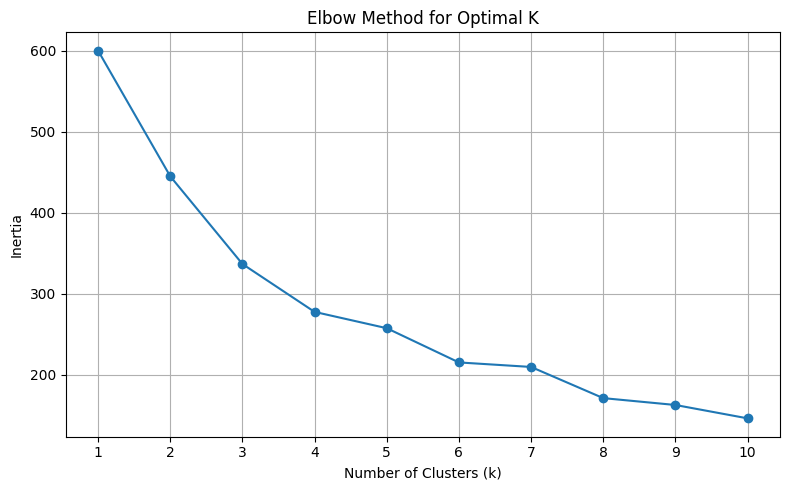

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# המרת רשימת הפיצ’רים ל-DataFrame
df_features = pd.DataFrame(feature_rows)

# שמירה על העתק של טיקר וסקטור
tickers = df_features['Ticker']
sectors = df_features['Sector']

# שמירה של הפיצ'רים המספריים בלבד
X = df_features.drop(['Ticker', 'Sector'], axis=1)

# סטנדרטיזציה (מומלץ לפני קלאסטרינג)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow method – נבדוק טווח של k מ-1 עד 10
inertia = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)  # מדד הפיזור הפנימי (within-cluster sum of squares)

# הצגת גרף Elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(K_range)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_features['Cluster_KMeans'] = kmeans.fit_predict(X_scaled)

In [ ]:
# הצגה של כמה דוגמאות
print(df_features[['Ticker', 'Sector', 'Cluster_KMeans']].head())

# אפשר גם לספור כמה מניות בכל קלאסטר
print(df_features['Cluster_KMeans'].value_counts())


  Ticker                  Sector  Cluster_KMeans
0   AAPL              Technology               1
1   MSFT              Technology               1
2   GOOG  Communication Services               1
3   AMZN  Consumer Discretionary               0
4   META  Communication Services               0
Cluster_KMeans
2    36
1    35
0    28
3     1
Name: count, dtype: int64


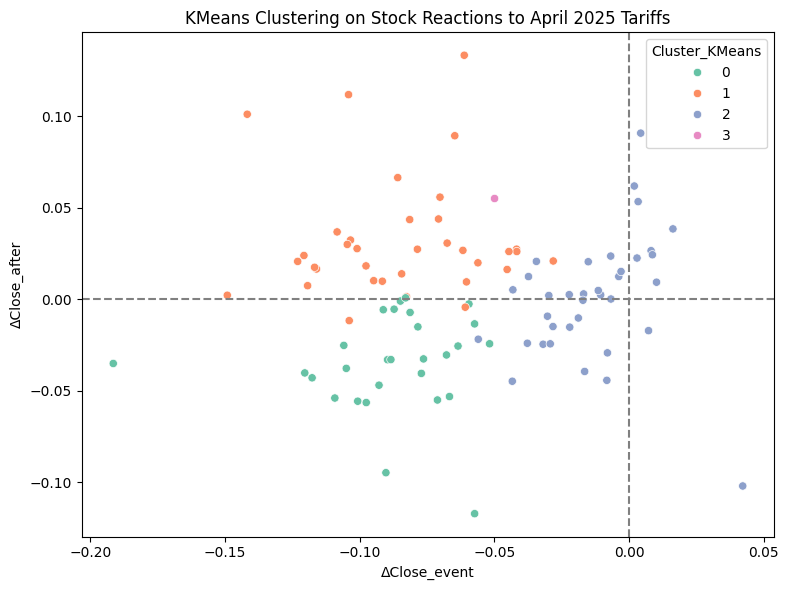

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_features,
    x='ΔClose_event',
    y='ΔClose_after',
    hue='Cluster_KMeans',
    palette='Set2'
)
plt.title("KMeans Clustering on Stock Reactions to April 2025 Tariffs")
plt.axhline(0, linestyle='--', color='gray')
plt.axvline(0, linestyle='--', color='gray')
plt.tight_layout()
plt.show()


In [ ]:
# הצגה מסודרת של כל קלאסטר
for c in sorted(df_features['Cluster_KMeans'].unique()):
    print(f"\nCluster {c} includes:")
    print(df_features[df_features['Cluster_KMeans'] == c][['Ticker', 'Sector']].value_counts('Sector'))



Cluster 0 includes:
Sector
Health Care               7
Technology                6
Consumer Discretionary    4
Industrials               3
Communication Services    2
Energy                    2
Financials                1
Consumer Staples          1
Materials                 1
Real Estate               1
Name: count, dtype: int64

Cluster 1 includes:
Sector
Technology                14
Financials                11
Health Care                4
Industrials                4
Communication Services     2
Name: count, dtype: int64

Cluster 2 includes:
Sector
Consumer Staples          9
Health Care               9
Consumer Discretionary    4
Communication Services    3
Financials                3
Industrials               3
Technology                2
Utilities                 2
Materials                 1
Name: count, dtype: int64

Cluster 3 includes:
Sector
Consumer Discretionary    1
Name: count, dtype: int64


### KMeans Clustering: Sector-Level Response to April 2025 Tariff Event

We applied KMeans clustering (k=3) on stock-level features that represent behavior before, during, and after the April 2025 tariff shock.  
Features included percentage change in closing price, RSI, and ATR between the three periods.

**Cluster 0** contained the majority of stocks (58 out of 100), including 19 from Technology, 11 from Financials, and 9 from Health Care.  
This suggests many sectors responded similarly — with a short-term decline followed by moderate recovery.

**Cluster 2** grouped smaller but more resilient sectors like Utilities and Materials, while  
**Cluster 1** (only 5 stocks) showed a unique rebound pattern — sharp drop during the event and strong recovery afterward.

The scatter plot shows each stock's response:  
- X-axis = % change in closing price during the event  
- Y-axis = % change after the event  
For example, AAPL dropped ~9.6% during the event and slightly recovered after.  
Stocks in the upper-left quadrant represent a typical “drop and rebound” behavior pattern.

This clustering approach helps reveal groups of stocks that responded similarly, even across different sectors.


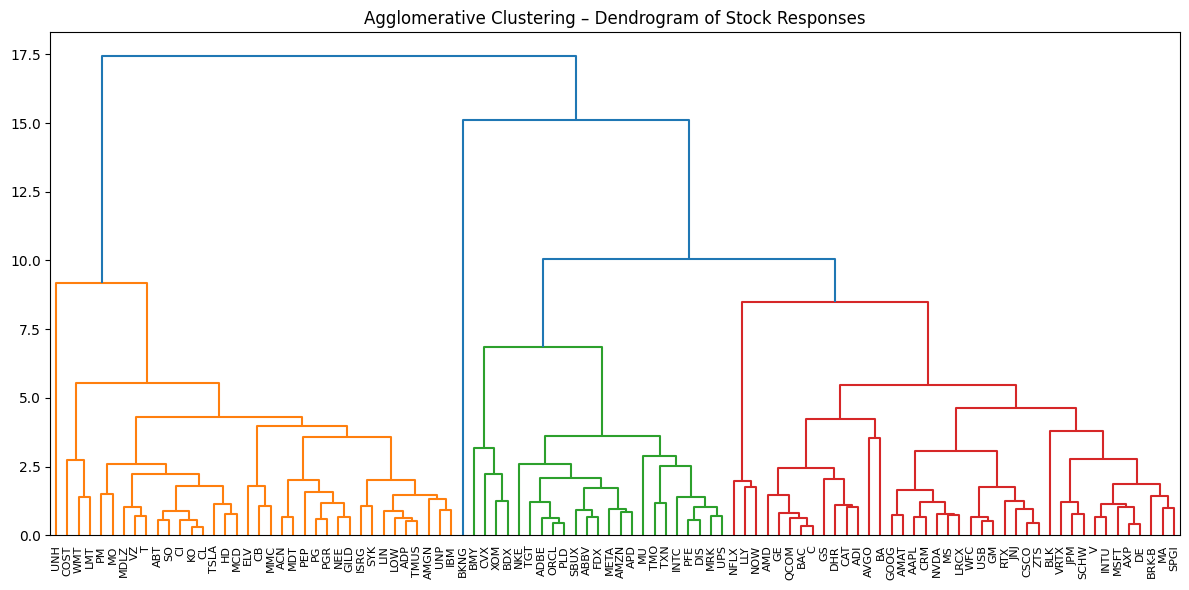

In [ ]:
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd

# הנחה: df_features כולל את כל הפיצ'רים והעמודות ['Ticker', 'Sector', ...]
X = df_features.drop(['Ticker', 'Sector', 'Cluster_KMeans'], axis=1)

# סטנדרטיזציה
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# יצירת היררכיה
linked = linkage(X_scaled, method='ward')

# ציור הדנדרוגרם
plt.figure(figsize=(12, 6))
dendrogram(
    linked,
    labels=df_features['Ticker'].values,
    leaf_rotation=90,
    leaf_font_size=8,
    color_threshold=10
)
plt.title("Agglomerative Clustering – Dendrogram of Stock Responses")
plt.tight_layout()
plt.show()


### Agglomerative Clustering: Hierarchical Analysis of Stock Reactions

To explore deeper behavioral patterns, we applied Agglomerative Clustering on all stocks using the same features as in KMeans (ΔClose, ΔRSI, ΔATR). The result was visualized as a dendrogram, showing how stocks cluster together based on similarity in their response to the April 2025 tariff event.

We observed several distinct groupings:
- Stocks such as **UNH**, **COST**, **WMT**, and **PEP** (mostly from defensive sectors like Health Care and Consumer Staples) clustered together early, suggesting they behaved similarly and more conservatively during and after the event.
- A large central group merged lower in the tree, indicating many stocks followed a common pattern — likely a sharp drop followed by stabilization or moderate recovery.
- Some stocks, like **BRK-B** and **SPGI**, joined only at the very top, implying they reacted in a more unique or extreme way compared to the rest of the market.

This hierarchical view helps uncover structural similarities and exceptions across the entire market response, beyond just sector labels.


## Step 3: Time Series Forecasting – Predicting MSFT Close Price
